<a href="https://colab.research.google.com/github/AllanBottino/Series_Temporais_Python/blob/main/Interpola%C3%A7%C3%A3o_de_dados_S%C3%A9ries_Temporais_Python_Parte_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Interpolação de dados:

Olá a todos, essa é uma continuação direta do artigo anterior (Downsampling e Upsampling), e vou dar o recado que sempre dou: Essa é uma explicação básica do básico. Como principal objetivo mostrar os comandos e pincelar a ideia, tendo em vista as ressalvas, comecemos:

"No campo matemático da análise numérica, a interpolação é um tipo de estimativa, um método de construção de novos pontos de dados dentro da faixa de um conjunto discreto de pontos de dados conhecidos." - Wikipedia

Você pode usar a função interpolate para preencher as linhas NaN (nulas/vazias) após a reamostragem usando diferentes métodos como pad, linear, quadrático, polinomial, spline etc.

Vamos pegar o primeiro exemplo em que reamostramos os dados de hora em hora e verificaremos o número de linhas com valores NaN que são criados durante a reamostragem. ---- Antes de começar, aviso que vou usar esse conjunto de dados: http://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+ Normalmente eu usaria o “Store Item Demand Forecasting Challenge” Mas o conjunto de dados do site acima, ficou bem melhor para esse exemplo ---

# 1 - Importando a Biblioteca:

In [1]:
import pandas as pd

import numpy as np

# O comando abaixo tira umas mensagens chatas.
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

import warnings
warnings.filterwarnings("ignore")

# 2 - Carregando dataset:

In [2]:
from google.colab import files
uploaded = files.upload()

Saving datatest.txt to datatest.txt
Saving datatest2.txt to datatest2.txt


In [3]:
import io

test = pd.read_csv(io.BytesIO(uploaded['datatest.txt']))

test2 = pd.read_csv(io.BytesIO(uploaded['datatest2.txt']))

df9 = pd.concat([test, test2])

df9[ 'date' ] = pd.to_datetime(df9['date'])

df10 = df9.copy()

df10 = df10.set_index('date')

print(df10.head())

                     Temperature  Humidity  ...  HumidityRatio  Occupancy
date                                        ...                          
2015-02-02 14:19:00      23.7000    26.272  ...       0.004764          1
2015-02-02 14:19:59      23.7180    26.290  ...       0.004773          1
2015-02-02 14:21:00      23.7300    26.230  ...       0.004765          1
2015-02-02 14:22:00      23.7225    26.125  ...       0.004744          1
2015-02-02 14:23:00      23.7540    26.200  ...       0.004767          1

[5 rows x 6 columns]


Antes de continuar vou fazer um "parentesis", esse dataset consegue mostrar aquilo que eu queria, consegue elucidar perfeitamente como o interpolate funciona com dados nulos, talvez seja (provavelmente) o culpado seja eu, mas esse dataset fica "estranho" quando se olha com mais cuidado, por isso relevem os erros e coisas estranhas que se deparem, e se atenham ao que eu estou mostrando que tudo ficará bem (Y).

In [4]:
# Aqui vamos reamostrar por "H" (hora) e criará um intervalo  de NaN.
df10 = df9.set_index('date').resample('H').mean()

print(df10.loc["2015-02-04 10:00:00" : "2015-02-11 14:00:00"].Temperature.head(1000))

date
2015-02-04 10:00:00    23.946885
2015-02-04 11:00:00          NaN
2015-02-04 12:00:00          NaN
2015-02-04 13:00:00          NaN
2015-02-04 14:00:00          NaN
                         ...    
2015-02-11 10:00:00          NaN
2015-02-11 11:00:00          NaN
2015-02-11 12:00:00          NaN
2015-02-11 13:00:00          NaN
2015-02-11 14:00:00    21.781250
Freq: H, Name: Temperature, Length: 173, dtype: float64


Aparentemente esse dataset quando você coloca ele com a reamostragem em "H" cria-se esse vácuo/intervalo, aparentemente são dados inexistentes no periodo H (de hora em hora).

In [5]:
print(df10[df10['Temperature'].isna()])

                     Temperature  Humidity  ...  HumidityRatio  Occupancy
date                                        ...                          
2015-02-04 11:00:00          NaN       NaN  ...            NaN        NaN
2015-02-04 12:00:00          NaN       NaN  ...            NaN        NaN
2015-02-04 13:00:00          NaN       NaN  ...            NaN        NaN
2015-02-04 14:00:00          NaN       NaN  ...            NaN        NaN
2015-02-04 15:00:00          NaN       NaN  ...            NaN        NaN
...                          ...       ...  ...            ...        ...
2015-02-11 09:00:00          NaN       NaN  ...            NaN        NaN
2015-02-11 10:00:00          NaN       NaN  ...            NaN        NaN
2015-02-11 11:00:00          NaN       NaN  ...            NaN        NaN
2015-02-11 12:00:00          NaN       NaN  ...            NaN        NaN
2015-02-11 13:00:00          NaN       NaN  ...            NaN        NaN

[171 rows x 6 columns]


Quando eu coloco o "Temperature" siguinifica que eu quero que o isna() filtre todos os valores nulos dentro da coluna Temperature.

Portanto, existem 171 linhas com valores NaN que são criados pela função de reamostragem.

No próximo gráfico vou usar ".fillna(0)", fillna, preenche os dados faltantes com o método que você escolher no nosso caso foi para preencher com zero, fillna(0).

E plotar no gráfico os valores faltantes com zero:

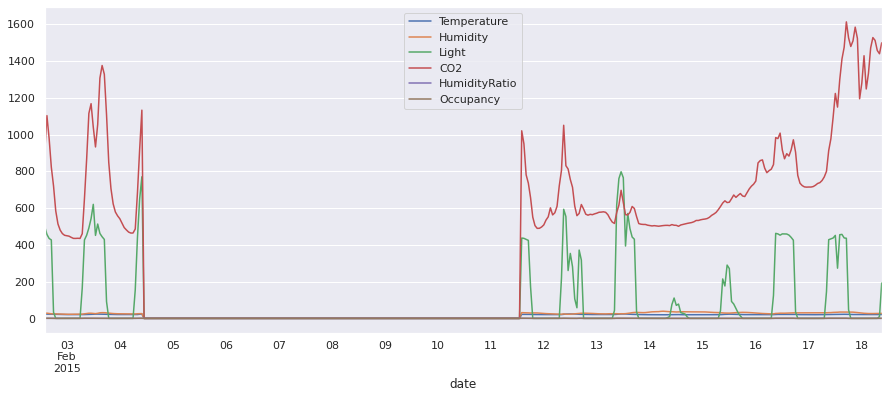

In [6]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,6)})
df10.fillna(0).plot()

Você pode ver aquela lacuna entre 05 e 11 são todos os valores que eram NaN e preenchidos por Zero para plotagem, ou seja, vazio.

Agora vamos entender como preencher os valores nulos (NaN) aqui com a função interpolar

# 3 - Interpolação linear :

Conforme wiki:

"interpolação linear é um método de ajuste de curva usando polinômios lineares para construir novos pontos de dados dentro do intervalo de um conjunto discreto de pontos de dados conhecidos."

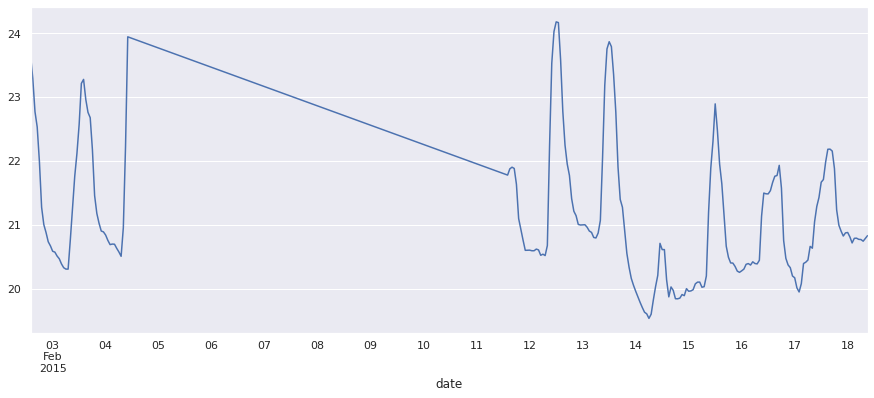

In [7]:
df10.Temperature.interpolate('linear').plot()

O método de interpolação linear, funciona basicamente traçando uma linha entre dois pontos, um ponto antes do primeiro valor NaN e um ponto depois do último valor NaN. E a partir dessa linha se é feito um cálculo de aproximação/média e então os valores NaN são preenchidos. Por isso que se chama interpolação LINEAR, pois se traça uma linha. Talvez a explicação não seja das melhores, mas você encontrará material que não acaba mais na internet sobre isso.

Agora vamos ver o que acontece com os dados após a interpolação:

In [8]:
df10 = df10.resample('H').mean().interpolate('linear')

df10[(df10.index > '2015-02-05') & (df10.index < '2015-02-11')]

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-05 01:00:00,23.758022,26.447939,741.347069,1123.010669,0.004807,1.0
2015-02-05 02:00:00,23.745431,26.478654,739.408818,1122.357823,0.004809,1.0
2015-02-05 03:00:00,23.732840,26.509370,737.470567,1121.704978,0.004810,1.0
2015-02-05 04:00:00,23.720249,26.540085,735.532316,1121.052132,0.004812,1.0
2015-02-05 05:00:00,23.707658,26.570801,733.594065,1120.399286,0.004813,1.0
...,...,...,...,...,...,...
2015-02-10 19:00:00,22.020477,30.686683,473.868435,1032.917958,0.005021,1.0
2015-02-10 20:00:00,22.007886,30.717398,471.930184,1032.265112,0.005022,1.0
2015-02-10 21:00:00,21.995295,30.748114,469.991933,1031.612266,0.005024,1.0


# 4 - Interpolação Polinomial:

Com o método de interpolação polinomial, estamos tentando ajustar uma curva polinomial para os pontos de dados ausentes

Existem diferentes métodos de interpolação polinomial como polinomial, spline disponível

Você precisa especificar a ordem para este método de interpolação.

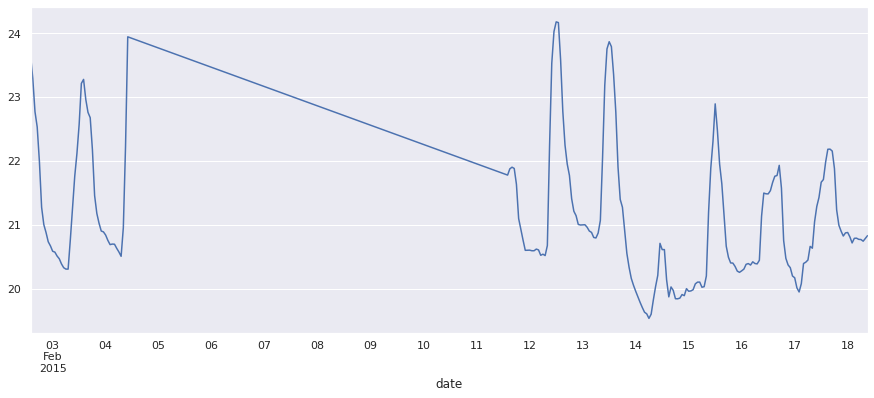

In [9]:
df10['Temperature'].interpolate('polynomial', order=2).plot()

Vamos ver os valores criados pela interpolação polinomial:

In [12]:
df10 = df10.resample('H').mean().interpolate('polynomial',order=2)

df10[(df10.index > '2015-02-05') & (df10.index < '2015-02-11')]

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-05 01:00:00,23.758022,26.447939,741.347069,1123.010669,0.004807,1.0
2015-02-05 02:00:00,23.745431,26.478654,739.408818,1122.357823,0.004809,1.0
2015-02-05 03:00:00,23.732840,26.509370,737.470567,1121.704978,0.004810,1.0
2015-02-05 04:00:00,23.720249,26.540085,735.532316,1121.052132,0.004812,1.0
2015-02-05 05:00:00,23.707658,26.570801,733.594065,1120.399286,0.004813,1.0
...,...,...,...,...,...,...
2015-02-10 19:00:00,22.020477,30.686683,473.868435,1032.917958,0.005021,1.0
2015-02-10 20:00:00,22.007886,30.717398,471.930184,1032.265112,0.005022,1.0
2015-02-10 21:00:00,21.995295,30.748114,469.991933,1031.612266,0.005024,1.0


Como podem ver existe diferença entre os métodos, pouca mais existe, são esses parametros que mexendo um pouco aqui e um pouco ali que causam melhora no desempenho da predição (é claro, quanto mais você souber melhor, mas em todo caso, um pouco de tentativa e erro também ajuda).

Existem mais métodos de interpolação e reamostragem, mas creio que para este artigo já está bom, a ideia era mostrar de maneira geral os conceitos e os comandos, acho que na medida do possível ficou bom.

Abraços.